<a href="https://colab.research.google.com/github/AryanXTH/AI-and-ML/blob/main/ML_and_AI_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

def MCP_Neurons_AND(X1, X2, T=2):
    """
    Implements the AND operation using an MCP neuron.

    Args:
    X1 (list or array): Binary input values.
    X2 (list or array): Binary input values.
    T (int): Threshold value (default is 2).

    Returns:
    list: Neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length"

    # Perform an element wise addition of two input arrays stored in a new array(list):
    new_array = np.array(X1) + np.array(X2)

    # Create a new array to put all the prediction let’s name that a state_neuron.
    # Append 1 in state_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = (new_array >= T).astype(int)

    return state_neuron

In [3]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)
# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0 0 0 1]


In [4]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This functions implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1 nd array): An array of binary values.
    X2 (1 nd array): An array of binary values.
    Output:
    state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
    """
    assert len(X1) == len(X2)
    # Perform an element wise addition of two input arrays stored in a new array(list):
    new_array = np.array(X1) + np.array(X2)
    # Create a new array to put all the prediction let’s name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = (new_array >= T).astype(int)
    return state_neuron

In [5]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1 # Threshold value for OR gate
# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)
# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0 1 1 1]


## QNO1. List out all the limitations of MCP - Neurons
- It cannot work on functions such as XOR, which are non linear in nature
- It doesn't have learning mechanism and gives output only in binary 0 and 1
- The Threshold and Weights are to be set manually rather than dynamically adjusting the weights

## QNO2. Think if you can develop a logic to solve for XOR function using MCP Neuron.
-> As We know that XOR is a non linear function which can be divided into 3 parts i.e. AND -> OR -> NOT = XOR we can divide and do the same process thrice to get the actual XOR value.

In [6]:
def MCP_Neuron(X, Y, W1, W2, T):
    total = (X * W1)+(Y * W2)
    if total >= T:
        return 1 # Neuron fires
    else:
        return 0  # Neuron doesn't fire

# XOR using MCP Neurons
def MCP_Neurons_XOR(x1, x2):

    AND_result = MCP_Neuron(x1, x2, 1, 1, 2)  # AND neuron
    OR_result = MCP_Neuron(x1, x2, 1, 1, 1)   # OR neuron

    NOT_AND_result = 1 if AND_result == 0 else 0  # Simple NOT operation

    XOR_result = MCP_Neuron(OR_result, NOT_AND_result, 1, 1, 2)

    return XOR_result

In [7]:
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"XOR({x1}, {x2}) = {MCP_Neurons_XOR(x1, x2)}")

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


# Task 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv") # Add the correct file path if necessary
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


## Qno 1: What does the shape of X represent?
-> The shape of X (a,b) represents the number of data points (a) and its features (b) in each data points

## Qno 2: What does the shape of Y represent?
-> The shape of Y represents the actual number of labels present in the dataset


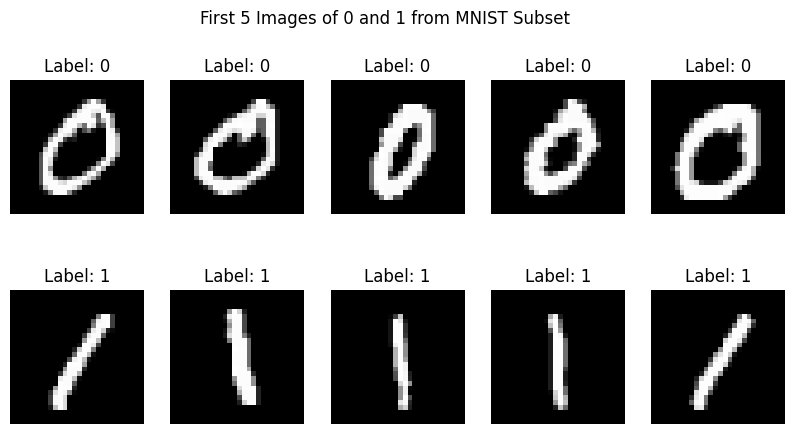

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0] # Get all images with label 0
images_1 = X[y == 1] # Get all images with label 1
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

Initialize weights and Bias

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Question - 3: What does the weights array represent in this context?
-> It represents the parameters which will be used to predict in the model where it determines which feature to be priortized while calculating an output.

## Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?
-> I think we might be initializing the weights to zero to test out how the model performs and then slightly change it's values in next iteration so that we can plot the difference and optimize our weights as per need.

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Compute the predictions (weighted sum of inputs plus bias)
    predictions = np.dot(X, weights) + bias

    # Activation function (step function)
    # The step function is used to predict the output: 1 if prediction > 0, else 0
    y_pred_all = np.where(predictions > 0, 1, 0)

    return y_pred_all


In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)
    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
        total_correct = 0

        for i in range(len(X)):
            # Calculate the prediction using the decision function (dot product + bias)
            prediction = np.dot(X[i], weights) + bias
            # Apply step function (activation)
            predicted_label = 1 if prediction > 0 else 0

            # Update weights and bias if there is a misclassification
            if predicted_label != y[i]:
                error = y[i] - predicted_label
                weights += learning_rate * error * X[i]  # Update weights
                bias += learning_rate * error  # Update bias

            # Count correct predictions
            if predicted_label == y[i]:
                total_correct += 1

        # Calculate accuracy for this epoch
        accuracy = total_correct / len(X)
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy*100:.2f}%")

    return weights, bias, accuracy


## Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?


In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 99.63%
Epoch 2/100 - Accuracy: 99.84%
Epoch 3/100 - Accuracy: 99.85%
Epoch 4/100 - Accuracy: 99.88%
Epoch 5/100 - Accuracy: 99.86%
Epoch 6/100 - Accuracy: 99.89%
Epoch 7/100 - Accuracy: 99.91%
Epoch 8/100 - Accuracy: 99.96%
Epoch 9/100 - Accuracy: 99.96%
Epoch 10/100 - Accuracy: 99.91%
Epoch 11/100 - Accuracy: 100.00%
Epoch 12/100 - Accuracy: 100.00%
Epoch 13/100 - Accuracy: 100.00%
Epoch 14/100 - Accuracy: 100.00%
Epoch 15/100 - Accuracy: 100.00%
Epoch 16/100 - Accuracy: 100.00%
Epoch 17/100 - Accuracy: 100.00%
Epoch 18/100 - Accuracy: 100.00%
Epoch 19/100 - Accuracy: 100.00%
Epoch 20/100 - Accuracy: 100.00%
Epoch 21/100 - Accuracy: 100.00%
Epoch 22/100 - Accuracy: 100.00%
Epoch 23/100 - Accuracy: 100.00%
Epoch 24/100 - Accuracy: 100.00%
Epoch 25/100 - Accuracy: 100.00%
Epoch 26/100 - Accuracy: 100.00%
Epoch 27/100 - Accuracy: 100.00%
Epoch 28/100 - Accuracy: 100.00%
Epoch 29/100 - Accuracy: 100.00%
Epoch 30/100 - Accuracy: 100.00%
Epoch 31/100 - Accuracy: 100.

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


## Question - 8:What does misclassified idx store, and how is it used in this code?


## Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”?

# Task 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df_3_5 = pd.read_csv("mnist_3_and_5.csv")  # Replace with correct path
X = df_3_5.drop(columns=["label"]).values  # Features: 784 pixels
y = df_3_5["label"].values  # Labels: 3 or 5
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


In [ ]:
# Convert labels 3 and 5 to binary labels (0 for 3, 1 for 5)
y = np.where(y == 3, 0, 1)

# Normalize the features to the range [0, 1]
X = X / 255.0


In [ ]:
# Step 2: Visualize a few examples of 3s and 5s
def visualize_samples(X, y, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        axes[i].imshow(X[i].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"Label: {y[i]}")
        axes[i].axis("off")
    plt.show()

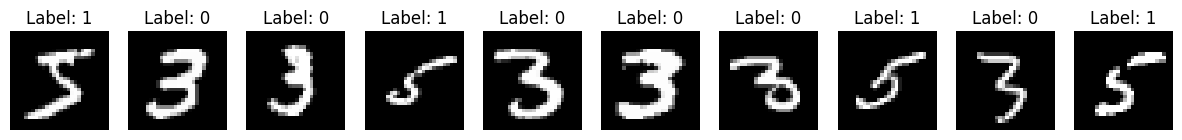

In [ ]:
visualize_samples(X, y, num_samples=10)

In [ ]:
# Step 3: Perceptron Algorithm
def perceptron(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])  # Initialize weights to zero (784 features)
    bias = 0  # Initialize bias to zero
    accuracy_history = []  # To store accuracy during training

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Perceptron decision rule
            output = np.dot(X[i], weights) + bias  # Weighted sum of inputs + bias
            prediction = 1 if output >= 0 else 0  # Activation function (step function)

            # Compute the error (True label - Predicted label)
            error = y[i] - prediction

            # Update weights and bias if there is an error
            if error != 0:
                weights += learning_rate * error * X[i]  # Update weights
                bias += learning_rate * error  # Update bias

        # Calculate accuracy at the end of each epoch
        predictions = np.dot(X, weights) + bias >= 0  # Compute all predictions
        accuracy = np.mean(predictions == y)  # Accuracy calculation
        accuracy_history.append(accuracy)
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy * 100:.2f}%")

    return weights, bias, accuracy_history

In [ ]:

# Step 4: Train the Perceptron
weights, bias, accuracy_history = perceptron(X, y, learning_rate=0.1, epochs=100)

Epoch 1/100, Accuracy: 92.56%
Epoch 2/100, Accuracy: 95.22%
Epoch 3/100, Accuracy: 95.66%
Epoch 4/100, Accuracy: 95.29%
Epoch 5/100, Accuracy: 91.43%
Epoch 6/100, Accuracy: 95.66%
Epoch 7/100, Accuracy: 96.42%
Epoch 8/100, Accuracy: 96.35%
Epoch 9/100, Accuracy: 96.50%
Epoch 10/100, Accuracy: 96.32%
Epoch 11/100, Accuracy: 97.56%
Epoch 12/100, Accuracy: 97.08%
Epoch 13/100, Accuracy: 96.53%
Epoch 14/100, Accuracy: 95.73%
Epoch 15/100, Accuracy: 94.89%
Epoch 16/100, Accuracy: 95.26%
Epoch 17/100, Accuracy: 96.68%
Epoch 18/100, Accuracy: 95.18%
Epoch 19/100, Accuracy: 95.29%
Epoch 20/100, Accuracy: 94.89%
Epoch 21/100, Accuracy: 90.08%
Epoch 22/100, Accuracy: 96.64%
Epoch 23/100, Accuracy: 92.48%
Epoch 24/100, Accuracy: 97.52%
Epoch 25/100, Accuracy: 95.55%
Epoch 26/100, Accuracy: 95.11%
Epoch 27/100, Accuracy: 94.67%
Epoch 28/100, Accuracy: 96.39%
Epoch 29/100, Accuracy: 96.06%
Epoch 30/100, Accuracy: 97.12%
Epoch 31/100, Accuracy: 97.23%
Epoch 32/100, Accuracy: 94.89%
Epoch 33/100, Acc

In [ ]:
# Step 5: Evaluate the performance
def evaluate_model(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias >= 0  # Compute all predictions
    accuracy = np.mean(predictions == y)  # Calculate accuracy
    return accuracy, predictions


In [ ]:
# Final Accuracy
accuracy, predictions = evaluate_model(X, y, weights, bias)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

Final Accuracy: 99.16%


In [ ]:
# Step 6: Visualize misclassified images
def visualize_misclassified(X, y, predictions, num_samples=5):
    misclassified_indices = np.where(predictions != y)[0]  # Find misclassified samples
    misclassified_samples = misclassified_indices[:num_samples]  # Get a few misclassified samples

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, idx in enumerate(misclassified_samples):
        axes[i].imshow(X[idx].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"True: {y[idx]}, Pred: {predictions[idx]}")
        axes[i].axis("off")
    plt.show()


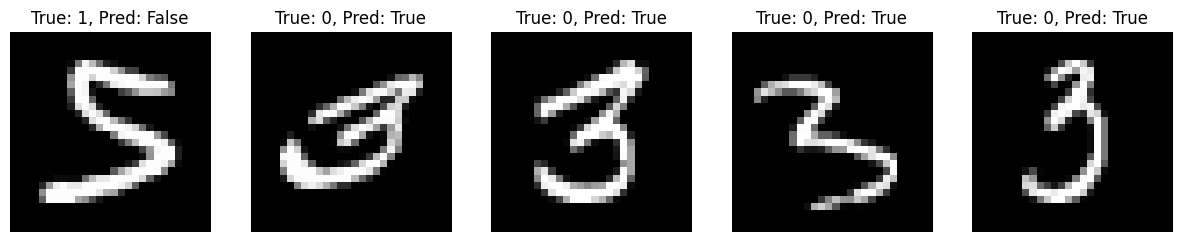

In [ ]:
# Visualize the misclassified images
visualize_misclassified(X, y, predictions, num_samples=5)

Conclusion:

We used the Perceptron learning algorithm to classify the digits 3 and 5. The final accuracy gives us an understanding of how well the model has learned to distinguish between the two digits. The misclassified images can provide insights into the areas where the model struggles.